In [1]:
from datetime import datetime
import statistics
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
import json

data = []
with open('Rana_Ayyub_01.json') as f:
    for line in f:
        data.append(json.loads(line))
# print(len(data))
with open('Rana_Ayyub_02.json') as f1:
    for line in f1:
        data.append(json.loads(line))
# print(len(data))
Rana_Ayyub_id = '268676434'

In [8]:
data[3]['includes']['tweets'][3]

{'id': '835105519492747264',
 'public_metrics': {'retweet_count': 0,
  'reply_count': 0,
  'like_count': 2,
  'quote_count': 0,
  'impression_count': 0},
 'lang': 'en',
 'in_reply_to_user_id': '268676434',
 'possibly_sensitive': False,
 'edit_history_tweet_ids': ['835105519492747264'],
 'text': '@RanaAyyub @ndtv Whatever happened is wonderful as Anti Nationals started playing victim card',
 'reply_settings': 'everyone',
 'author_id': '73709190',
 'conversation_id': '835102933251461120',
 'referenced_tweets': [{'type': 'replied_to', 'id': '835102933251461120'}],
 'entities': {'mentions': [{'start': 0,
    'end': 10,
    'username': 'RanaAyyub',
    'id': '268676434'},
   {'start': 11, 'end': 16, 'username': 'ndtv', 'id': '37034483'}],
  'annotations': [{'start': 56,
    'end': 64,
    'probability': 0.5079,
    'type': 'Organization',
    'normalized_text': 'Nationals'}]},
 'created_at': '2017-02-24T12:34:06.000Z',
 'edit_controls': {'edits_remaining': 5,
  'is_edit_eligible': True,
  '

In [3]:
rana_ayyub_conversation_ids = set()
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):  
        if (tweets_arr[i]['conversation_id'] == tweets_arr[i]['id']) and (tweets_arr[i]['author_id'] == '268676434'):
            rana_ayyub_conversation_ids.add(tweets_arr[i]['conversation_id'])
print(len(rana_ayyub_conversation_ids))

4690


In [9]:
people = set()
tweets = []
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):  
        if (tweets_arr[i]['conversation_id'] in rana_ayyub_conversation_ids):
            people.add(tweets_arr[i]['author_id'])
            tweets.append(tweets_arr[i]['author_id'])
print(len(people))
print(len(tweets))

190040
803101


In [4]:
######### PROOF THAT A CONVERSATION'S TWEETS CAN BE ANYWHERE WITHIN THE DATASET #########

tweets = []
indices = []
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)): 
        if tweets_arr[i]['conversation_id'] == '1239603353283260416':
            tweets.append(tweets_arr[i]['id'])
            indices.append(index)
# print(Counter(indices))

Counter({3504: 115, 3535: 114, 3531: 113, 3493: 112, 3512: 112, 3486: 111, 3523: 111, 3489: 110, 3503: 110, 3505: 110, 3529: 110, 3513: 109, 3484: 108, 3474: 107, 3494: 107, 3495: 107, 3545: 107, 3549: 107, 3487: 106, 3492: 106, 3514: 106, 3527: 106, 3542: 106, 3544: 106, 3546: 106, 3488: 105, 3499: 105, 3500: 105, 3508: 105, 3510: 105, 3517: 105, 3530: 105, 3555: 105, 3475: 104, 3490: 104, 3507: 104, 3509: 104, 3524: 104, 3541: 104, 3553: 104, 3561: 104, 3550: 103, 3528: 102, 3597: 102, 3598: 102, 3491: 101, 3498: 101, 3502: 101, 3515: 101, 3519: 101, 3522: 101, 3533: 101, 3538: 101, 3548: 101, 3602: 101, 3516: 100, 3520: 100, 3532: 100, 3534: 100, 3536: 100, 3540: 100, 3554: 100, 3567: 100, 3589: 100, 3526: 99, 3537: 99, 3539: 99, 3547: 99, 3485: 98, 3501: 98, 3552: 98, 3559: 98, 3563: 98, 3573: 98, 3578: 98, 3580: 98, 3586: 98, 3588: 98, 3594: 98, 3511: 97, 3556: 97, 3558: 97, 3584: 97, 3518: 96, 3521: 96, 3543: 96, 3581: 96, 3506: 95, 3557: 95, 3562: 95, 3577: 95, 3579: 95, 3593: 9

In [30]:
######### PROOF THAT A TWEET DATA CAN BE REPEATED #########
tweets_arr = data[14369]['includes']['tweets']
for i in range(len(tweets_arr)): 
    if tweets_arr[i]['conversation_id'] == '1239603353283260416':
        break
a = tweets_arr[i]


In [31]:
######### PROOF THAT A TWEET DATA CAN BE REPEATED #########
tweets_arr = data[15194]['includes']['tweets']
for i in range(len(tweets_arr)): 
    if tweets_arr[i]['conversation_id'] == '1239603353283260416':
        break
b = tweets_arr[i]

In [152]:
######### INITIALISAING ACTIVITY TRACE DICTIONARY #########
activity_traces = {}
for element in rana_ayyub_conversation_ids:
    activity_traces[element] = []

In [153]:
######### ACCUMLATING TWEETS UNDER THEIR CONVERSATION ID #########
count = 0
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):
        conversation_id = tweets_arr[i]['conversation_id']
        if conversation_id in rana_ayyub_conversation_ids:
            if 'referenced_tweets' in tweets_arr[i]:
                if tweets_arr[i]['referenced_tweets'][0]['type'] == 'replied_to':
                    if [tweets_arr[i]['id'], datetime.fromisoformat(tweets_arr[i]['created_at'][:19]), tweets_arr[i]['author_id'], 1] in activity_traces[conversation_id]:
                        count += 1
                    else:
                        activity_traces[conversation_id].append([tweets_arr[i]['id'], datetime.fromisoformat(tweets_arr[i]['created_at'][:19]), tweets_arr[i]['author_id'], 1])
                elif tweets_arr[i]['referenced_tweets'][0]['type'] == 'quoted':
                    if [tweets_arr[i]['id'], datetime.fromisoformat(tweets_arr[i]['created_at'][:19]), tweets_arr[i]['author_id'], 2] in activity_traces[conversation_id]:
                        count += 1
                    else:
                        activity_traces[conversation_id].append([tweets_arr[i]['id'], datetime.fromisoformat(tweets_arr[i]['created_at'][:19]), tweets_arr[i]['author_id'], 2])
            else:
                if [tweets_arr[i]['id'], datetime.fromisoformat(tweets_arr[i]['created_at'][:19]), tweets_arr[i]['author_id'], 0] in activity_traces[conversation_id]:
                    count += 1
                else:
                    activity_traces[conversation_id].append([tweets_arr[i]['id'], datetime.fromisoformat(tweets_arr[i]['created_at'][:19]), tweets_arr[i]['author_id'], 0])
            
# 0 for original tweet, 1 for reply to another tweet, 2 for quoted tweet.
# 54607 duplicated
print(count)

54572


In [154]:
######### SORTING WITHIN AN ACTIVITY TRACE BASED ON TIME #########
sorted_activity_trace_dirty = []
for key in activity_traces:
        sorted_activity_trace_dirty.append(sorted(activity_traces[key], key=lambda d: d[1]))

In [155]:
######### REMOVING ACTIVITY TRACES THAT ARE OF LENGTH ONE OR LESS #########
index = []
sorted_activity_trace = []
for i in range(len(sorted_activity_trace_dirty)):
    if len(sorted_activity_trace_dirty[i]) > 1:
        sorted_activity_trace.append(sorted_activity_trace_dirty[i]) 

In [156]:
######### PROOF THAT ACTIVITY TRACES LESS THAN LENGTH TWO ARE REMOVED #########
count = 0
index = []
for i in range(len(sorted_activity_trace)):
    if len(sorted_activity_trace[i]) <= 1:
        count += 1
# print(count)

0


In [157]:
######### CREATING USER ID MAPPING AND THE REVERSE MAPPING TO OBTAIN INPUT MARKS VALUES AND DECODE THEM #########
ents = []
for actTrace in sorted_activity_trace:
    for act in actTrace:
        ents.append(act[2])

idmap = {}
other_way = {}
for idx, ent in enumerate(set(ents)):
    idmap[ent] = idx
    other_way[idx] = ent



In [104]:
texts = []
count = 0
sample_data = []
flag = 0
bleh = set()
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):
        if "RT @" in tweets_arr[i]['text'][:5]:
            sample_data.append(tweets_arr[i])

In [141]:
who = []
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):
        if 'referenced_tweets' in tweets_arr[i]:
            if tweets_arr[i]['referenced_tweets'][0]['type'] == 'quoted':
                if tweets_arr[i]['author_id'] != '268676434':
                    pass
        else:
            if tweets_arr[i]['author_id'] != '268676434' and tweets_arr[i]['conversation_id'] in rana_ayyub_conversation_ids:
                who.append(tweets_arr[i])

In [142]:
who[:5]

[]

In [172]:
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):
        pass

In [158]:
numTraces = len(sorted_activity_trace)

np.random.shuffle(sorted_activity_trace)

valTraces = sorted_activity_trace[:int(0.1*numTraces)]
testTraces = sorted_activity_trace[int(0.1*numTraces):int(0.2*numTraces)]
trainTraces = sorted_activity_trace

4597


In [159]:
userId = 268676434

In [161]:
print(len(sorted_activity_trace))
print(len(trainTraces))

4597
4597


In [162]:
for key in activity_traces:
    if len(activity_traces[key]) == 11437:
        print(key)

1239603353283260416


In [187]:
split = {}
cols = ['arrival_times', 'delta_times', 'marks', 'tweet_type']

for col in cols:
    split[col] = []

tweetSeqMap = {}
lengths = []

for idx, activityTrace in enumerate(trainTraces): 
    assert int(activityTrace[0][2]) == userId
    
    starts = [act[1] for act in activityTrace]
    iStart = starts[0]
    
    normStarts = [ (act[1] - iStart).total_seconds()/(24*3600) for act in activityTrace]
    assert normStarts[0] == 0
    deltaTimes = [1.0] 
    for i in range(1,len(normStarts)):
        deltaTimes.append(normStarts[i] - normStarts[i-1] )
        
    marks = []
    for i in range(len(normStarts)):
        marks.append(idmap[activityTrace[i][2]])
    
    tweet_type = []
    for i in range(len(normStarts)):
        tweet_type.append(activityTrace[i][3])
        
    tweetSeqMap[activityTrace[0][0]] = idx
    lengths.append(len(normStarts))
    split['arrival_times'].append(normStarts)
    split['delta_times'].append(deltaTimes)
    split['marks'].append(marks)
    split['tweet_type'].append(tweet_type)

In [181]:
split1 = {}
for col in cols:
    split1[col] = []
for idx, activityTrace in enumerate(testTraces): 
    assert int(activityTrace[0][2]) == userId
    
    starts = [act[1] for act in activityTrace]
    iStart = starts[0]
    
    normStarts = [ (act[1] - iStart).total_seconds()/(24*3600) for act in activityTrace]
    assert normStarts[0] == 0
    deltaTimes = [1.0] 
    for i in range(1,len(normStarts)):
        deltaTimes.append( normStarts[i] - normStarts[i-1] )
        
    marks = []
    for i in range(len(normStarts)):
        marks.append(idmap[activityTrace[i][2]])
        
    tweet_type = []
    for i in range(len(normStarts)):
        tweet_type.append(activityTrace[i][3])
        
    tweetSeqMap[activityTrace[0][0]] = idx
    
    split1['arrival_times'].append(normStarts)
    split1['delta_times'].append(deltaTimes)
    split1['marks'].append(marks)
    split1['tweet_type'].append(tweet_type)

In [188]:
split2 = {}

for col in cols:
    split2[col] = []
for idx, activityTrace in enumerate(valTraces): 
    assert int(activityTrace[0][2]) == userId
    
    starts = [act[1] for act in activityTrace]
    iStart = starts[0]
    
    normStarts = [ (act[1] - iStart).total_seconds()/(24*3600) for act in activityTrace]
    assert normStarts[0] == 0
    deltaTimes = [1.0] 
    for i in range(1,len(normStarts)):
        deltaTimes.append( normStarts[i] - normStarts[i-1] )
        
    marks = []
    for i in range(len(normStarts)):
        marks.append(idmap[activityTrace[i][2]])
        
    tweet_type = []
    for i in range(len(normStarts)):
        tweet_type.append(activityTrace[i][3])
    tweetSeqMap[activityTrace[0][0]] = idx

    split2['arrival_times'].append(normStarts)
    split2['delta_times'].append(deltaTimes)
    split2['marks'].append(marks)
    split2['tweet_type'].append(tweet_type)

In [183]:
data_result = {}
data_result["train"] = split
data_result["test"] = split1
data_result["dev"] = split2
data_result['dim_process'] = 190040

In [184]:
import pickle
with open('attempt_train.pkl', 'wb') as file:
    pickle.dump(data_result, file)

In [185]:
with open('attempt_test.pkl', 'wb') as file:
    pickle.dump(data_result, file)

In [186]:
with open('attempt_dev.pkl', 'wb') as file:
    pickle.dump(data_result, file)

In [28]:
with open('attempt_dev.pkl', 'rb') as file:
    new_split = pickle.load(file)

In [29]:
if new_split == data_result:
    print("amazing")

amazing


In [178]:
print(len(set(ents)))

190040


In [104]:
print(split)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [190]:
cluster = []
with open('u_cluster.npy') as f:
    lines = f.readlines()
    for val in lines:
        cluster.append(int(val[0]))

cluster_0 = []
cluster_1 = []
for i in range(len(cluster)):
    if cluster[i] == 0:
        cluster_0.append(other_way[i])
    if cluster[i] == 1:
        cluster_1.append(other_way[i])

            


In [191]:
print(Counter(cluster))

Counter({1: 186588, 0: 3452})


In [192]:
import pickle 
with open('coordinated_attacker_user_id.pkl', 'wb') as fp:
    pickle.dump(cluster_1, fp)
with open('uncoordinated_user_ids.pkl', 'wb') as fp:
    pickle.dump(cluster_0, fp)

In [196]:
with open('updated_coordinated_attacker_user_id.pkl', 'rb') as fp:
    new_cluster_1 = pickle.load(fp)
with open('updated_uncoordinated_user_ids.pkl', 'rb') as fp:
    new_cluster_0 = pickle.load(fp)

In [194]:
if new_cluster_1 == cluster_1:
    print("Again amazing")
if new_cluster_0 == cluster_0:
    print("Great")

Again amazing
Great


In [205]:
coordinated_attacker_tweets = {}
all_attacker_tweets = []
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):  
        if tweets_arr[i]['author_id'] in cluster_1:
            all_attacker_tweets.append(tweets_arr[i]['text'])
            if tweets_arr[i]['author_id'] in coordinated_attacker_tweets:
                coordinated_attacker_tweets[tweets_arr[i]['author_id']].append(tweets_arr[i]['text'])
            else:
                coordinated_attacker_tweets[tweets_arr[i]['author_id']] = []

In [206]:
all_attacker_tweets[:10]

['@RanaAyyub @sky_phd Read it. Found nothing of substance. Lies, presumptions with no mention of Godhra train burning killing Karsevaks\n\nThat court dismissed her book comes as no surprise',
 '🧵 Must read. https://t.co/tfXqa7G3cO',
 '@RanaAyyub Anupam Babu deserves Padma Award if he has been able to disturb you. Left terror in education institutions will end. get ready...',
 "@RanaAyyub #PakCheerleaders it's no. 1 trend in India congratumation Ms PakCheerleaders",
 '@RanaAyyub @firstpost @irrfan_k simple solution PAKISTAN ,he will refer IRFAN to PAKISTAN BHEJO SAMITI operated by bhakts for being traitor😀',
 '@RanaAyyub Kamlesh Tiwari was asked to shut up too.',
 "@RanaAyyub Why don't you talk abt malda also ? Can you do a piece as to why ppl turn terrorists and that too predminantly from one religion",
 '@RanaAyyub @firstpost @irrfan_k madam b little tolerant... 😃😃😃😃',
 '@RanaAyyub anupam babu asked irrfan tum tbb kahaa the jb kashmiri pandito ka kaatleaam hua?',
 '@RanaAyyub do you l

In [111]:
string = "@RanaAyyub #PakCheerleaders it's no. 1 trend in India congratumation Ms PakCheerleaders"
string[11:].find(" ")

16

228


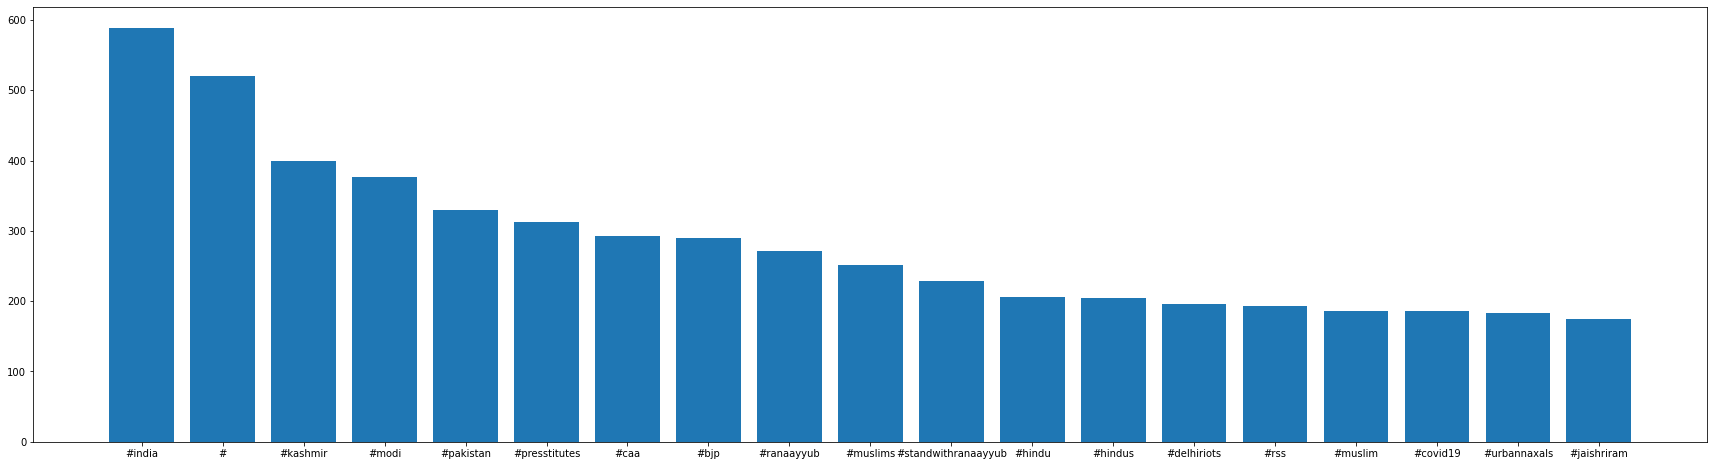

In [207]:
hashtags = []
for tweet in all_attacker_tweets:
    indices = [i for i, symbol in enumerate(tweet) if symbol == "#"]
    for index in indices:
        end_index = tweet[index:].find(" ")
        other_end_index = tweet[index+1:].find("#")
        if end_index == -1 or other_end_index == -1:
            hashtags.append(tweet[index:max(end_index, other_end_index)+index].lower())
        else:
            hashtags.append(tweet[index:min(end_index, other_end_index)+index].lower())

counter_data = Counter(hashtags)
print(counter_data["#standwithranaayyub"])
most_common = dict(counter_data.most_common(20))
del most_common [""]
plt.figure(figsize=(30,8))
plt.bar(most_common.keys(), most_common.values())
plt.show()


In [197]:
uncoordinated_attacker_tweets = {}
all_uncoordinated_tweets = []
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):  
        if tweets_arr[i]['author_id'] in cluster_0:
            all_uncoordinated_tweets.append(tweets_arr[i]['text'])
            if tweets_arr[i]['author_id'] in uncoordinated_attacker_tweets:
                uncoordinated_attacker_tweets[tweets_arr[i]['author_id']].append(tweets_arr[i]['text'])
            else:
                uncoordinated_attacker_tweets[tweets_arr[i]['author_id']] = []

1


/Users/magizhshankar/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/magizhshankar/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/magizhshankar/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/magizhshankar/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/magizhshankar/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2337 (\N{DEVANAGARI LET

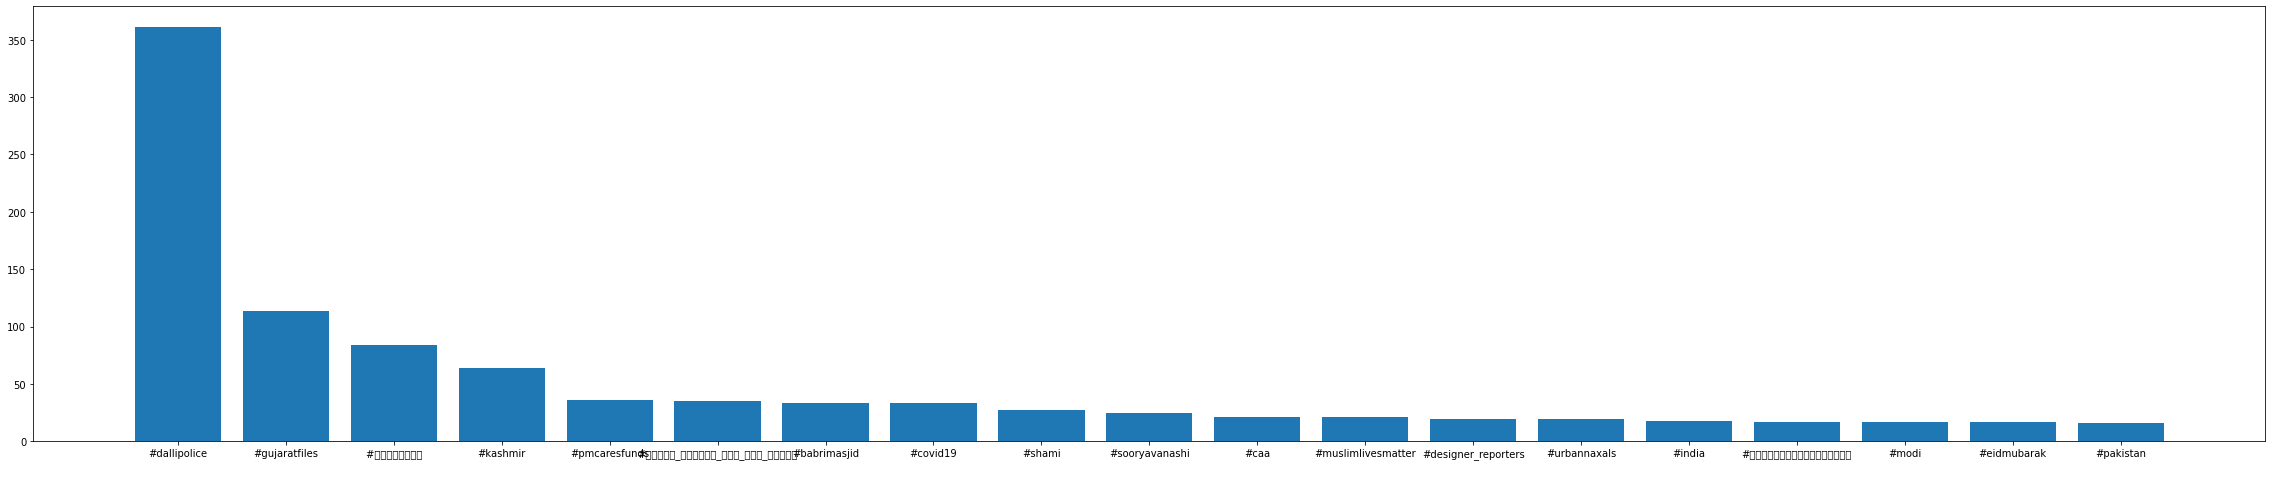

In [209]:
hashtags_1 = []
for tweet in all_uncoordinated_tweets:
    indices = [i for i, symbol in enumerate(tweet) if symbol == "#"]
    for index in indices:
        end_index = tweet[index:].find(" ")
        other_end_index = tweet[index+1:].find("#")
        if end_index == -1 or other_end_index == -1:
            hashtags_1.append(tweet[index:max(end_index, other_end_index)+index].lower())
        else:
            hashtags_1.append(tweet[index:min(end_index, other_end_index)+index].lower())
hashtags_1[:20]
counter_data = Counter(hashtags_1)
most_common_1 = dict(counter_data.most_common(20))
del most_common_1 [""]
print(counter_data["#standwithranaayyub"])
plt.figure(figsize=(40,8))
plt.bar(most_common_1.keys(), most_common_1.values())
plt.show()

In [45]:
cluster_1

['753217206243225600',
 '4094724854',
 '1035821939938353152',
 '4766225850',
 '1092143336',
 '117315774',
 '732803722531737600',
 '1509365164197351429',
 '2911858879',
 '417763872',
 '2365326475',
 '813712037305950208',
 '703098337671585794',
 '4824670605',
 '1194573634867585024',
 '1532235559313510400',
 '1058558790231093248',
 '1146496378312392704',
 '4446693575',
 '947808895484829696',
 '1048097139052634112',
 '71530217',
 '2383340192',
 '1193281847800815618',
 '151771976',
 '1107165595814887424',
 '1098119686456295424',
 '2926890164',
 '3423802425',
 '2275195015',
 '131744761',
 '853894333413470208',
 '192772511',
 '1322255465829445633',
 '464275191',
 '2662559083',
 '2529300740',
 '434870123',
 '61502257',
 '1128666043415531522',
 '1134996469717524480',
 '2832733470',
 '1268853736916439041',
 '110682003',
 '135477591',
 '771304237276000256',
 '116229812',
 '712531678808444928',
 '2867762216',
 '4005219852',
 '918528908',
 '3283417940',
 '1209435382405722113',
 '2370595232',
 '3078

In [77]:
if new_cluster_1 == cluster_1:
    print("Again amazing")

Again amazing


In [78]:
import pandas as pd
panda_list = []
count_above_ten = 0
for key in list(coordinated_attacker_tweets.keys()):
    if len(coordinated_attacker_tweets[key]) >= 10:
        temp = []
        count_above_ten += 1
        temp.append(key)
        for j in range(10):
            temp.append(coordinated_attacker_tweets[key][j])
        panda_list.append(temp)
        
df = pd.DataFrame(panda_list, columns =['User_ID', 'Text1', 'Text2', 'Text3', 'Text4', 'Text5', 'Text6', 'Text7', 'Text8', 'Text9', 'Text10'])
pd.set_option('display.max_colwidth', None)
df.head(20)

,User_ID,Text1,Text2,Text3,Text4,Text5,Text6,Text7,Text8,Text9,Text10
0,170395745,@RanaAyyub @tehelkadotcom When a Rapist and a Presstitute meets Shit Happens..#IshratCoverup #CongExposedOnIshrat #IshratHauntsCongress,@RanaAyyub @TIME https://t.co/MsecYF8Iaz,@RanaAyyub @TIME https://t.co/mxccICzEAc,@RanaAyyub @TIME https://t.co/2wn019zbuJ,@RanaAyyub @TIME https://t.co/TspqRxaQEM,@RanaAyyub @TIME https://t.co/AEOoHCZ77M,@ersumi01 @attaullah_mir @RanaAyyub @LRC_NDTV @PatrickFrench2 That's cool bro witch-hunting haha,@RanaAyyub @PatrickFrench2 @LRC_NDTV Don't feel bad we don't take you seriously anyway.,@attaullah_mir @RanaAyyub @LRC_NDTV @PatrickFrench2 Yeah Comedy Nights with Kapil only airs once in the week,@rahulkanwal you terrorist apologist are leeches sucking the blood out of this old country.
1,103558074,@RanaAyyub Madam why dont you u ask Tejpal Sir (ur Mentor-Thehalka News) to reveal the true story why is he in Goa these days.,@RanaAyyub ur Jhooth could be easily checked.why u do this ?? This journalism @sardesairajdeep @rahulkanwal @BDUTT https://t.co/KzURtPsi4z,@RanaAyyub @ajaydevgn @narendramodi since Ajay is supporter of Modi u will victimise him by writing against him don't worry we r with him,@RanaAyyub In ur say “ No body should praise @narendramodi .. “ true .. the voices are in millions and billions who are parsing him .. it seems u r devoid of any script so you be in limelight u keep writing bakwas,@RanaAyyub what did u do to save hindus from dying of hunger u earn crores by selling false narrative on Gujarat riot 2002. what did u do with that money did u share a penny with the riot victims or even at this time of need did u come out to run a kitchen for poor . its BIG NO Shameless,@AbdulkaderMB @RanaAyyub and where is muslim sympathy killing innocent Sikhs in Afghanistan.. same on u ur age reflect ur maturity,@RanaAyyub &amp; @BDUTT one thing common false propaganda !! Since the book didn't do anything now she is friend of Dalit. Grow up we know u,@RanaAyyub Not a single place in India is in mess.. it's radical's mindset to term a violence a disturb place.both r part India &amp; remain so 👍,"@RanaAyyub Rajendra Prasad, on the other hand, responded by stating, ""I would do the same with a mosque or a church if I were invited...This is the core of Indian secularism. Our state is neither irreligious nor anti-religious."" Invite @narendramodi he will be more than happy to do so.",@RanaAyyub @NewYorker good 😊
2,997028598,@RanaAyyub I am not a reporter but would love to discuss current issue with you when in Akola. I don't believe or agree with any of your POVs but we live in a democracy and therefore will like to know them (even if from my perspective they are wrong),"@RanaAyyub Are you any ""certifying authority"" of ""secularism""??? From when do ""Hindus"" need to prove he/she is secular???? Hinduism is more of a culture than just a religion and secularism is the inherent part of Hinduism.",@RanaAyyub you guys don't care of national interest.,@shabanS58770496 @RanaAyyub https://t.co/C8boEN787j,"@RanaAyyub Yes. Maybe because citizens like ""me"" who have grown up listening to the horrific stories of partitions from our own grandparents have every reason to blame the ""Gandhi-Nehru-Jinnah"" for killing and violence in 1947-48. Shouldn't they be blamed for ""Partition Massacre""","@RanaAyyub u just said ""kill nationalism"", is it? Yes killing anyone is wrong but why not Gandhi be held accountable for partition &amp;killings","@RanaAyyub You are a blood thirsty person. You are not with anyone ""Indian"". You are ""paid"" to work in the interest of someone mysterious. Your ""intention"" is to make an atmosphere of fear, hate and confusion in the country. #DelhiRiotTruth",@RanaAyyub @AJEnglish @RanaAyyub ki tabiyat to thik hai?,"@RanaAyyub Madamji we too live in the same home. You dont like us and therefore you dont even find it important to understand our viewpoint. Still our Constitution give us the right do good 

In [200]:
cluster_0_new = cluster_0[:1000]

In [201]:
normal_tweets = {}
for index in range(len(data)):
    tweets_arr = data[index]['includes']['tweets']
    for i in range(len(tweets_arr)):  
        if tweets_arr[i]['author_id'] in cluster_0_new:
            if tweets_arr[i]['author_id'] in normal_tweets:
                normal_tweets[tweets_arr[i]['author_id']].append(tweets_arr[i]['text'])
            else:
                normal_tweets[tweets_arr[i]['author_id']] = []

In [208]:
panda_list_normal = []
count_above_ten_normal = 0
for key in list(normal_tweets.keys()):
    if len(normal_tweets[key]) >= 10:
        temp = []
        count_above_ten_normal += 1
        temp.append(key)
        for j in range(10):
            temp.append(normal_tweets[key][j])
        panda_list_normal.append(temp)
        
df_normal = pd.DataFrame(panda_list_normal, columns =['User_ID', 'Text1', 'Text2', 'Text3', 'Text4', 'Text5', 'Text6', 'Text7', 'Text8', 'Text9', 'Text10'])
pd.set_option('display.max_colwidth', None)
df_normal.head(40)

,User_ID,Text1,Text2,Text3,Text4,Text5,Text6,Text7,Text8,Text9,Text10
0,1054001585531969537,@ManojM66 @RanaAyyub @BabbooPahelwan @KamalaHarris @IlhanMN @antonioguterres Very true!,@mudassir_israr @RanaAyyub You are my ideal😍😍! My joy is unbound.,"@AudreyTruschke Ignore it and keep doing what you do best, telling the historical truths. More power and strength to you.😎😎",@RanaAyyub Exactly!,@minicnair @saliltripathi 🤪🤪🤪🤪😇,@RanaAyyub Most of the journalists are a laughing stock. Just watch the live debates on leading channels. One wonders which institute of eminence they went to learn journalism!,@RanaAyyub @RSF_inter You have made us proud. 😇❤️,@RanaAyyub Why not MBS?,@PrannoyRoyNDTV Been a fan of your brand of journalism. You had been a role model and an inspiration for a whole generation. Keenly looking forward to reading the book.,@RanaAyyub The only real medicine for #Omicron
1,1369044612,@RanaAyyub What she means is that let the hate model perish and society reborn filled with love,"@RanaAyyub I agree with you completely, what our PM has not visited communal riots victim, our HM praises Delhi police and telling lies. The only hope is common public who looked after each other under most difficult times. Let us pray that goodness triumphs over evil and the society reborn","@RanaAyyub This is the worst damage BJP has done to India- that Muslims have become 2nd class citizens. But the tragedy that ‘hindus’ do not realise is that this will percolate and create a Manu vadi society, where every one is equal but some are more equal than others.",@kushalsheth2015 @RanaAyyub Don’t people realise that their birth in a Hindu upper caste family is an accident - can not they imagine that if they had been born as a girl in lower caste or Muslim what would have been their views?,@RanaAyyub I as a Hindu is ashamed at what my country has become - in name of religion even the judiciary has become unjust.,@RanaAyyub I as a Hindu is ashamed at what my country has become - in name of religion even the judiciary has become unjust.,@RanaAyyub I as a Hindu is ashamed at what my country has become - in name of religion even the judiciary has become unjust.,@RanaAyyub Teach patels a lesson and take care of ones own,@RanaAyyub Get well soon,@RanaAyyub I forgot Tharoor
2,502786642,@RanaAyyub She is quoting Ram Jethmalani and thinks none would come forward to harm her for something quoted but has to avoid siding with a another female in similar situation. Is she then is an upright journalist?,"@RanaAyyub Aur sahi ko galat kahtey rahna to maut sey bhi badtar hai Ma'am, wo har lambey Marney jaisa hai.","@RanaAyyub U were present everywhere, how do u do it? Must b having super natural powers of some kind!",@jiteshsingh99 @RanaAyyub In fact they thought Muslim voters will buy that line but young Muslim voters understand what is what and who is who.,@M_S_A09 @RanaAyyub I only hope that Muslims at large will see the falsehood of Congress.,"@RanaAyyub The biggest problem with #Congress is that it is a party if corrupt leaders. Since it has been an all India party and opposed to the progressive ideas and poses to be saviours of Muslims from some imaginary threat, it is supported by them.",@RanaAyyub Magar wo isliye boley ke #Congress ko haraana tha!,"@RanaAyyub This case in fact gives them all the more solid opportunity and valid platform to spread the message they wished to give PM, in process of defending themselves or they have themselves developed cold feet?",@RanaAyyub Satyamev Jayatey!,"@RanaAyyub if anyone kills innocents for any cause, right or wrong, deserves to be counted out as human, pl have your common sense back!"
3,1370448334842785795,@RanaAyyub Rana Ayyub perfectly scolded @HSShilpaM... Arre madam 😂😂😂,@Pappu2687 @RanaAyyub Ek Sacha andhbhakt banna Kaha aasan hai... Yu samajhlo\n\nThuk Ka Darya hai or chaat kr Jana hai...,@RanaAyyub Duniya me sabke waha Bachche paida hote hai pr hamare desh me andhbhakt k waha Israel baap ban kr paida ho Gaya,@de

In [189]:
ents

['268676434',
 '141901906',
 '19669858',
 '3190502058',
 '4593628400',
 '87713090',
 '742375890408112129',
 '3300343946',
 '560177694',
 '2320203512',
 '743345968364478464',
 '161623566',
 '1059532153',
 '335307686',
 '2486762587',
 '268676434',
 '85291749',
 '268676434',
 '131518468',
 '1181880631418130432',
 '1011971289295278081',
 '70613331',
 '1198733966037008385',
 '1122941265585364992',
 '56887606',
 '2339770056',
 '53387032',
 '1132259802539675648',
 '3226459009',
 '3220102314',
 '846657279600611328',
 '606095373',
 '2377405748',
 '88587097',
 '88587097',
 '383784704',
 '793708699558682624',
 '1038767561117130752',
 '1081088474298503168',
 '70613331',
 '354271242',
 '1191291330858610689',
 '106687627',
 '3308229484',
 '101942221',
 '1163214685002354689',
 '307829839',
 '3277132176',
 '456478706',
 '1198169483354898432',
 '2893783398',
 '423275973',
 '6299142',
 '66915181',
 '974224247806615552',
 '232506887',
 '1186276463533641728',
 '2893783398',
 '27845865',
 '75053806',
 '750

In [ ]:
cluster_old = []
cluster_updated = []
with open('u_cluster.npy') as f:
    lines = f.readlines()
    for val in lines:
        cluster_old.append(int(val[0]))

dict_all = {}
for i in range(len(cluster_old)):
    if cluster_old[i] == 0:
        cluster_0.append(other_way[i])
    if cluster_old[i] == 1:
        cluster_1.append(other_way[i])